# Nanowire Design 

Using BSC Theory, we can write the kinetic inductance in terms of nanowire dimensions, so that: 
    
(1)   $L_K= \frac {l}{w} \frac{R_{sq}h}{2\pi^2 \Delta} \frac{1}{\tanh{\frac{\Delta}{2k_BT}}}$  , where $l$ and $w$ are the length and width respectively, $\Delta$ is the energy gap and $R_{sq}$ is the sheet resistance.


But $\Delta$ depends on the coherence length $\xi$ according to 

(2) $\Delta = \Delta_{00} e^{\frac{-\pi\xi}{4}}$

we can know more information about $\xi$ from the bias current $I$ according to 

(3) $\frac{I}{I_c}=1.897 e^{\frac{-3\pi\xi}{8}}\sqrt{\xi}(\frac{\pi}{2}-\frac{2}{3}\xi)$




Ref: https://iopscience.iop.org/article/10.1088/0957-4484/21/44/445202/meta

T is equal to 0.001
T is equal to 10.001


Text(0.78, 1.07, 'T=0K')

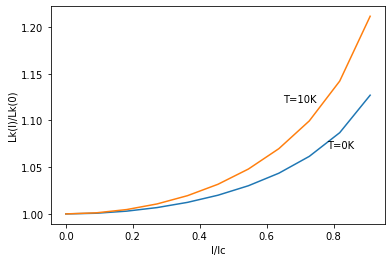

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math


#Problem Parameters
m = 9.1093e-31  ## electron mass
e = 1.60217e-17 ## electron charge
#I=5 ##Bias Current
Ic=11 ## Critical current                         
l=10e-6 ## length of the nanowire                 
w=100e-9 ## width of the nanowire                   
d=10e-9 ## Thickness of the nanowire  
Tc=11 ## Critical Temperature From literature
T=2e-3 ##operating temperature
k=1.38e-23 ##Boltzman Constant
del00= 1.76*k*Tc ##Energy Gap at zero temp and zero bias current
ro=93e-8 ## resistivity of NbTiN from literature
h=6.626e-34 ##Plank's Constant


for T in range (0,20,10): #running the code at two different temperatures T=0K and 10K
    
    T=T+0.001
    print("T is equal to", T) #troubleshooting
    
    
    #Different values of l
    #for l in range (100,500,10):
    
    #l=l*1e-6
    #print("length is equal to",l) #troubleshooting
    
    
    arr1=[] ##for storing I/Ic values
    arr2=[] ##for storing Lk values
    arr3=[] ##for storing Lk/Lk(0) values


    #sweeping I
    for I in range (11):

        #Solving for \xi
        def func(xi):
            return [(I/Ic) - (1.897*(math.exp(-3*np.pi*xi[0]/8))*math.sqrt(xi[0])*(np.pi/2-2*xi[0]/3))] ##equation3
        xi = fsolve(func, [0])


        #Solving for delta
        delta=del00*math.exp(-np.pi*xi/4) ##equation2

        #Solving for Lk
        Lk=(l/(w*d))*(ro*h)/(2*(np.pi**2)*delta*math.tanh(delta/(2*k*T))) ##equation1    

        arr1.append(I/Ic)
        arr2.append(Lk)

    for number in arr2:
        arr3.append(number / arr2[0])

    #Do the plot        
    plt.plot(arr1,arr3)    
    
       
plt.xlabel("I/Ic")
plt.ylabel("Lk(I)/Lk(0)")
#plt.axis([0.2, 0.45, 1, 1.05]) ##Scaling
plt.text(0.65, 1.12, "T=10K")
plt.text(0.78, 1.07, "T=0K")